<a href="https://colab.research.google.com/github/123sandra/Phishing-Detection-Model/blob/main/Phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('/content/drive/MyDrive/dataset.csv')
data

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


***Exploratory Data Analysis(EDA)***

In [4]:
data['Result'].value_counts()

,count
Result,
1,6157
-1,4898


There is not much imbalance in data, thus we don't have to use Oversampling or Undersampling.☺️

In [5]:
data.isnull().sum()

,0
index,0
having_IPhaving_IP_Address,0
URLURL_Length,0
Shortining_Service,0
having_At_Symbol,0
double_slash_redirecting,0
Prefix_Suffix,0
having_Sub_Domain,0
SSLfinal_State,0
Domain_registeration_length,0


In [6]:
data.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [7]:
data.drop('index',axis=1,inplace=True)
data.columns

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [8]:
val=['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in val:
  data[i]=le.fit_transform(data[i])
data

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,0,2,1,1,0,0,0,0,0,1,...,1,1,0,0,0,0,1,2,0,0
1,1,2,1,1,1,0,1,2,0,1,...,1,1,0,0,1,0,1,2,1,0
2,1,1,1,1,1,0,0,0,0,1,...,1,1,1,0,2,0,1,1,0,0
3,1,1,1,1,1,0,0,0,1,1,...,1,1,0,0,2,0,1,0,1,0
4,1,1,0,1,1,0,2,2,0,1,...,0,1,0,0,1,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,0,1,0,1,1,2,2,0,0,...,0,0,1,1,0,0,1,2,1,1
11051,0,2,1,0,0,0,2,0,0,0,...,0,1,1,1,2,1,1,0,1,0
11052,1,0,1,1,1,0,2,0,0,1,...,1,1,1,1,2,0,1,1,1,0
11053,0,0,1,1,1,0,0,0,1,0,...,0,1,1,1,2,0,1,2,1,0


In [9]:
data['Result'].value_counts()

,count
Result,
1,6157
0,4898


In [11]:
X=data.iloc[:,:-1]
X

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,0,2,1,1,0,0,0,0,0,1,...,1,1,1,0,0,0,0,1,2,0
1,1,2,1,1,1,0,1,2,0,1,...,1,1,1,0,0,1,0,1,2,1
2,1,1,1,1,1,0,0,0,0,1,...,1,1,1,1,0,2,0,1,1,0
3,1,1,1,1,1,0,0,0,1,1,...,1,1,1,0,0,2,0,1,0,1
4,1,1,0,1,1,0,2,2,0,1,...,1,0,1,0,0,1,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,0,1,0,1,1,2,2,0,0,...,0,0,0,1,1,0,0,1,2,1
11051,0,2,1,0,0,0,2,0,0,0,...,1,0,1,1,1,2,1,1,0,1
11052,1,0,1,1,1,0,2,0,0,1,...,1,1,1,1,1,2,0,1,1,1
11053,0,0,1,1,1,0,0,0,1,0,...,1,0,1,1,1,2,0,1,2,1


In [13]:
y=data.iloc[:,-1]
y

,Result
0,0
1,0
2,0
3,0
4,1
...,...
11050,1
11051,0
11052,0
11053,0


*Modelling*

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [15]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred
print("Classification Report",classification_report(y_test,y_pred))

Classification Report               precision    recall  f1-score   support

           0       0.96      0.93      0.94      1444
           1       0.95      0.97      0.96      1873

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
rf=RandomForestClassifier(random_state=10)
ada=AdaBoostClassifier(random_state=10)
xgb=XGBClassifier(random_state=10)
models=[rf,ada,xgb]
for model in models:
  model_name = type(model).__name__
  print(model_name)
  model.fit(X_train,y_train)
  y_predict=model.predict(X_test)
  y_predict
  print(classification_report(y_test,y_predict))

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1444
           1       0.97      0.98      0.98      1873

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317

AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1444
           1       0.93      0.95      0.94      1873

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317

XGBClassifier
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1444
           1       0.97      0.98      0.98      1873

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg      

As we can see SVC and AdaBoost classifier did not gave maximum accurcy thus we can either use RandomForest or XGBClassifier.🙂‍↕️

<Axes: >

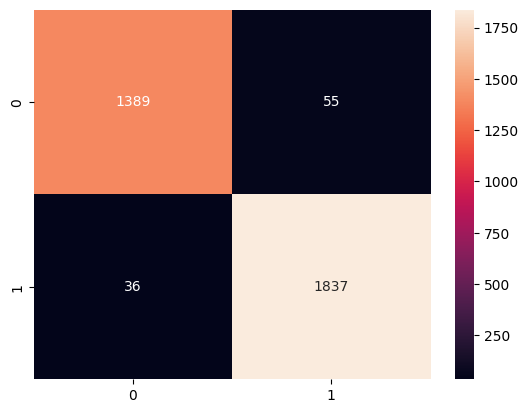

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=set(y_test),yticklabels=set(y_predict))

Prediction on new datas

In [21]:
y_new=model.predict([[0,2,1,1,0,0,0,2,1,0,1,0,0,0,2,0,1,0,1,1,0,1,0,1,2,1,0,1,1,0]])
if y_new==1:
  print('Legitimate')
else:
  print('Phising')

Phising
